Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Load and Inspect the Data

In [4]:
# Define the file path in Google Colab
file_name = '/content/advertising.csv'

try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded '{file_name}'.")

    # Display the first 5 rows
    print("\n--- Data Head ---")
    print(df.head())

    # Display info about columns, data types, and non-null counts
    print("\n--- Initial Data Info ---")
    df.info()

    # Get descriptive statistics
    print("\n--- Descriptive Statistics ---")
    print(df.describe())

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure you have uploaded 'advertising.csv' to your Colab session.")

Successfully loaded '/content/advertising.csv'.

--- Data Head ---
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

--- Descriptive Statistics ---
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.37500

Exploratory Data Analysis (EDA)

Displaying pairplot to visualize relationships...


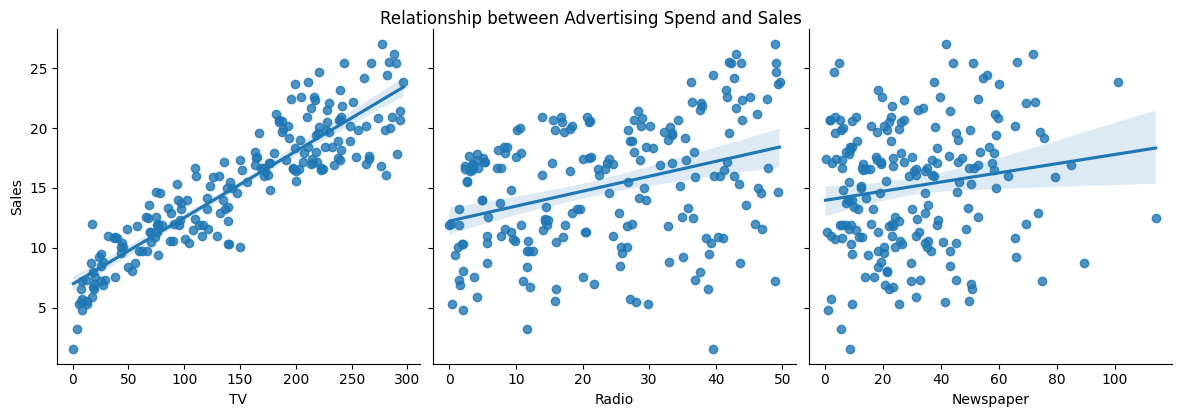

In [5]:
# We use a pairplot to visualize the relationships
# We are looking for a clear relationship (like a line) in the bottom-left plots
print("Displaying pairplot to visualize relationships...")
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.suptitle('Relationship between Advertising Spend and Sales', y=1.02)
plt.savefig('sales_pairplot.png')
plt.show()

Define Features (X) and Target (y)

In [6]:
# Define our features
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]

# Define our target
y = df['Sales']

print("Features (X) defined with columns:", X.columns.tolist())
print("Target (y) defined as 'Sales'.")

Features (X) defined with columns: ['TV', 'Radio', 'Newspaper']
Target (y) defined as 'Sales'.


Split Data into Training and Testing Sets

In [7]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Split Complete ---")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

--- Data Split Complete ---
Training set shape: (160, 3)
Test set shape: (40, 3)


Train the Model

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

print("Training the Linear Regression model...")
# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Training the Linear Regression model...
Model training complete.


Evaluate the Model

--- Model Evaluation on the Test Set ---
R-squared (R²): 0.9059
Mean Absolute Error (MAE): 1.2748


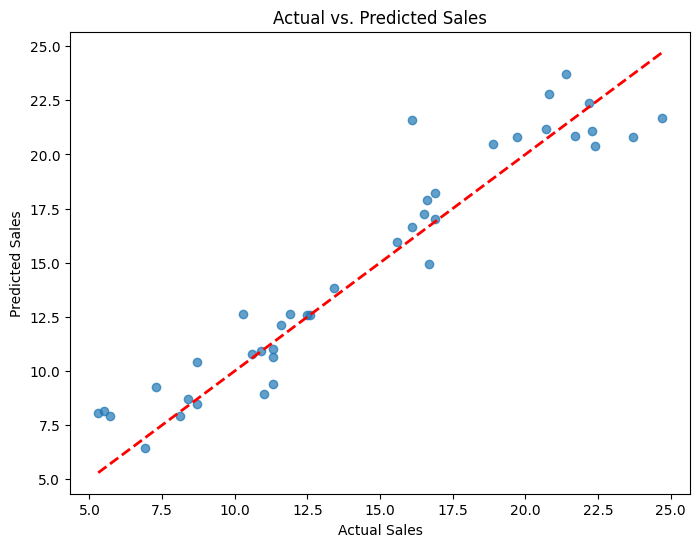

In [9]:
print("--- Model Evaluation on the Test Set ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# You can also plot predictions vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.savefig('actual_vs_predicted.png')
plt.show()

Interpret the Model (Making Decisions)

In [10]:
print("--- Model Interpretation ---")

# The 'intercept' is the baseline sales if we spend $0 on ads
print(f"Intercept: {model.intercept_:.4f}")

# The 'coefficients' show the increase in sales for each $1
# (or 1 unit) spent on that platform.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)

--- Model Interpretation ---
Intercept: 4.7141

Coefficients:
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


Example Prediction

In [12]:
# What would sales be if we spent:
# TV: $100,000
# Radio: $20,000
# Newspaper: $10,000
# Note: The data is in thousands, so we use 100, 20, 10
new_budget = [[100, 20, 10]]

# Make the prediction
predicted_sales = model.predict(new_budget)

print(f"\n--- Example Prediction ---")
print(f"With a budget of TV=$100k, Radio=$20k, Newspaper=$10k...")
print(f"The model predicts sales of: {predicted_sales[0]:.2f} units")


--- Example Prediction ---
With a budget of TV=$100k, Radio=$20k, Newspaper=$10k...
The model predicts sales of: 12.23 units


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
